In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# no missing values
# handling char val
# as horsepower is numerical value but here in dataset it is given object .. so we will convert this column into int

def horsepwr(h):
    h = h.replace('?','0')
    h = int(h)
    return h
data['horsepower_new'] = data['horsepower'].map(horsepwr)
data.drop('horsepower', axis=1,inplace = True)

<Axes: >

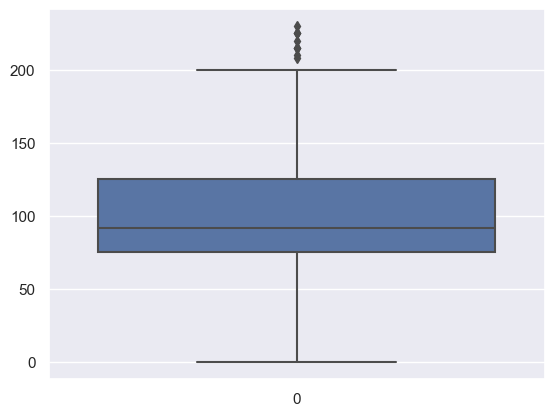

In [5]:
sns.boxplot(data['horsepower_new'])

In [6]:
data['horsepower_new'] = data['horsepower_new'].replace(0, data['horsepower_new'].median())

In [7]:
data.isnull().sum()

mpg               0
cylinders         0
displacement      0
weight            0
acceleration      0
model_year        0
origin            0
name              0
horsepower_new    0
dtype: int64

# treating outlier 

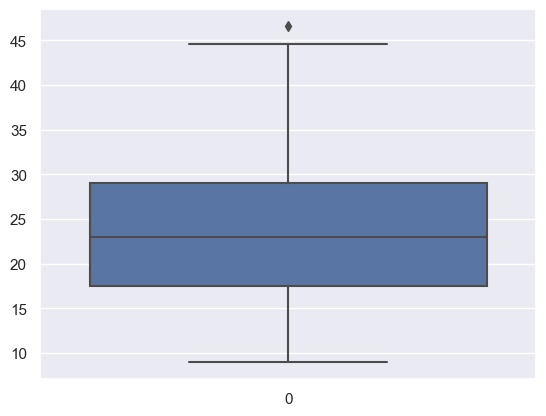

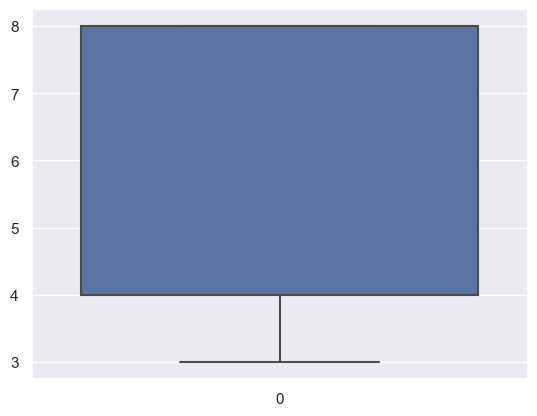

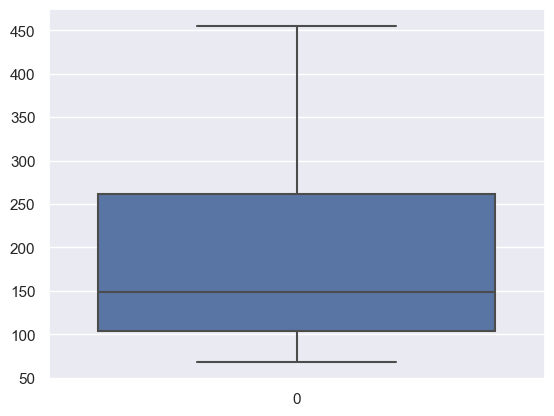

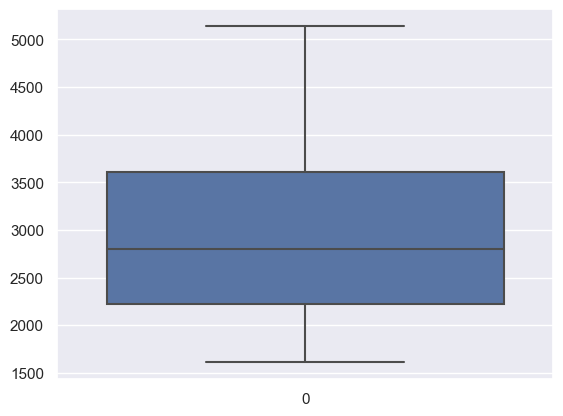

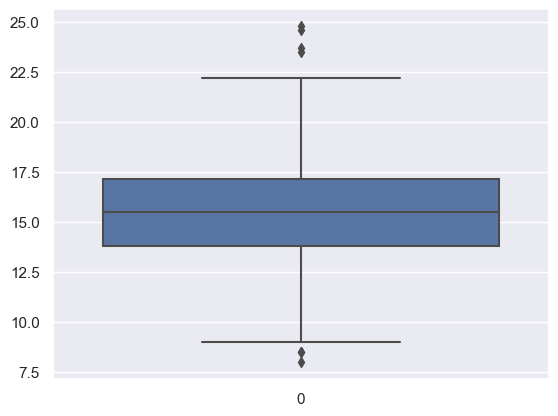

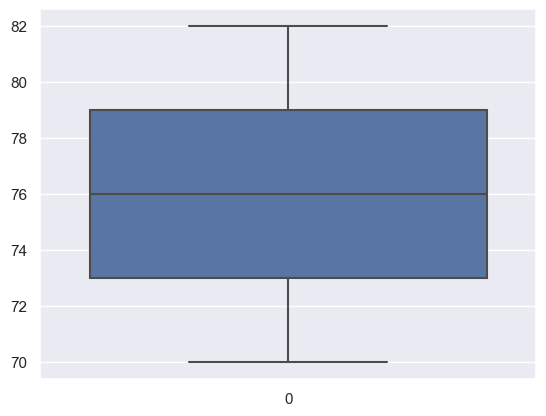

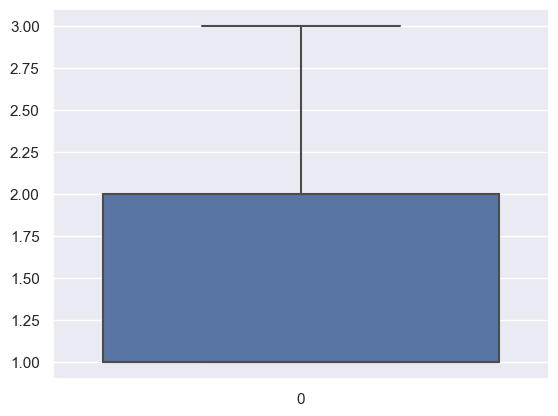

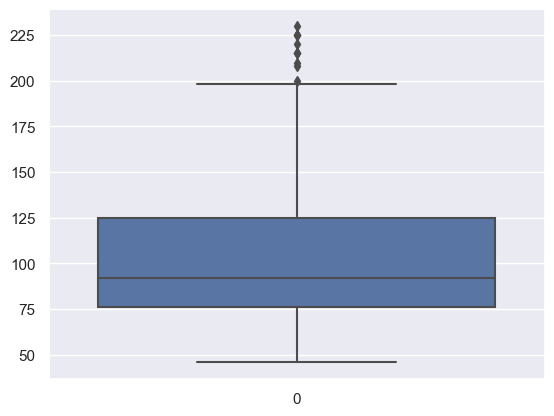

In [8]:
def boxplot(col):
    sns.boxplot(data[col])
    plt.show()
for i in list(data.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplot(i)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   weight          398 non-null    int64  
 4   acceleration    398 non-null    float64
 5   model_year      398 non-null    int64  
 6   origin          398 non-null    int64  
 7   name            398 non-null    object 
 8   horsepower_new  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


<Axes: >

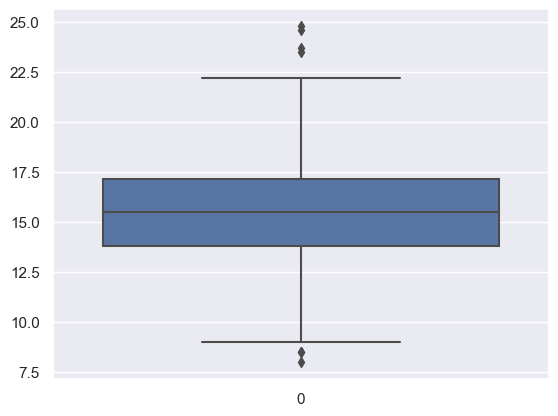

In [10]:
sns.boxplot(data['acceleration'])

In [11]:
# treating outlier
Q1 = data['acceleration'].quantile(0.25)
Q3 = data['acceleration'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 +1.5*IQR
lower_limit = Q1  - 1.5*IQR
print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

Q1:  13.825000000000001
Q3:  17.175
IQR:  3.3499999999999996
upper limit:  22.2
lower limit:  8.8


In [12]:
data['acceleration'] = np.where(data['acceleration']>upper_limit, upper_limit,
                                np.where(data['acceleration']<lower_limit,lower_limit,
                                        data['acceleration']))

In [13]:
#label encoding for name
data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [14]:
# categorical_features = ['origin','cylinders','model year' ]

In [15]:
from sklearn.preprocessing import LabelEncoder
origin_enco = LabelEncoder()
data['origin'] = origin_enco.fit_transform(data['origin'])

In [16]:
cylinder_enco = LabelEncoder()
data['cylinders'] = cylinder_enco.fit_transform(data['cylinders'])

In [17]:
data['cylinders'].value_counts()

cylinders
1    204
4    103
3     84
0      4
2      3
Name: count, dtype: int64

In [18]:
model_enco = LabelEncoder()
data['model_year'] = model_enco.fit_transform(data['model_year'])

## Feature Scaling


In [19]:
data.drop("name",axis = 1, inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   weight          398 non-null    int64  
 4   acceleration    398 non-null    float64
 5   model_year      398 non-null    int64  
 6   origin          398 non-null    int64  
 7   horsepower_new  398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


In [21]:
x = data.iloc[:,2:]
y = data.iloc[:,0:1]

In [22]:
x.head()

,displacement,weight,acceleration,model_year,origin,horsepower_new
0,307.0,3504,12.0,0,0,130
1,350.0,3693,11.5,0,0,165
2,318.0,3436,11.0,0,0,150
3,304.0,3433,12.0,0,0,150
4,302.0,3449,10.5,0,0,140


In [23]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)


,0,1,2,3,4,5
0,1.090604,0.630870,-1.320595,-1.627426,-0.715145,0.673589
1,1.503514,0.854333,-1.506489,-1.627426,-0.715145,1.590266
2,1.196232,0.550470,-1.692383,-1.627426,-0.715145,1.197404
3,1.061796,0.546923,-1.320595,-1.627426,-0.715145,1.197404
4,1.042591,0.565841,-1.878278,-1.627426,-0.715145,0.935497
...,...,...,...,...,...,...
393,-0.513026,-0.213324,0.017842,1.621983,-0.715145,-0.478804
394,-0.925936,-0.993671,2.471644,1.621983,0.533222,-1.369289
395,-0.561039,-0.798585,-1.469311,1.621983,-0.715145,-0.531185
396,-0.705077,-0.408411,1.133207,1.621983,-0.715145,-0.662139


In [25]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,-1.606755e-16,-1.071170e-16,2.142340e-16,-5.355850e-17,1.428227e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.604943e+00,-2.510317e+00,-1.627426e+00,-7.151448e-01,-1.526434e+00
25%,-8.563178e-01,-8.828266e-01,-6.420819e-01,-8.150739e-01,-7.151448e-01,-7.407114e-01
50%,-4.314040e-01,-1.973624e-01,-1.933672e-02,-2.721449e-03,-7.151448e-01,-3.216593e-01
75%,6.584879e-01,7.538337e-01,6.034085e-01,8.096310e-01,5.332220e-01,5.426356e-01
max,2.511784e+00,2.565185e+00,2.471644e+00,1.621983e+00,1.781589e+00,3.292665e+00


In [26]:
var = sc_x
var.shape

(398, 6)

# checking multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = sc_x
vif =pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(var,i) for i in range(var.shape[1])]
vif['features'] = x.columns

In [28]:
vif

,variance_inflation_factor,features
0,12.178992,displacement
1,10.498106,weight
2,2.596991,acceleration
3,1.244622,model_year
4,1.729181,origin
5,9.432523,horsepower_new


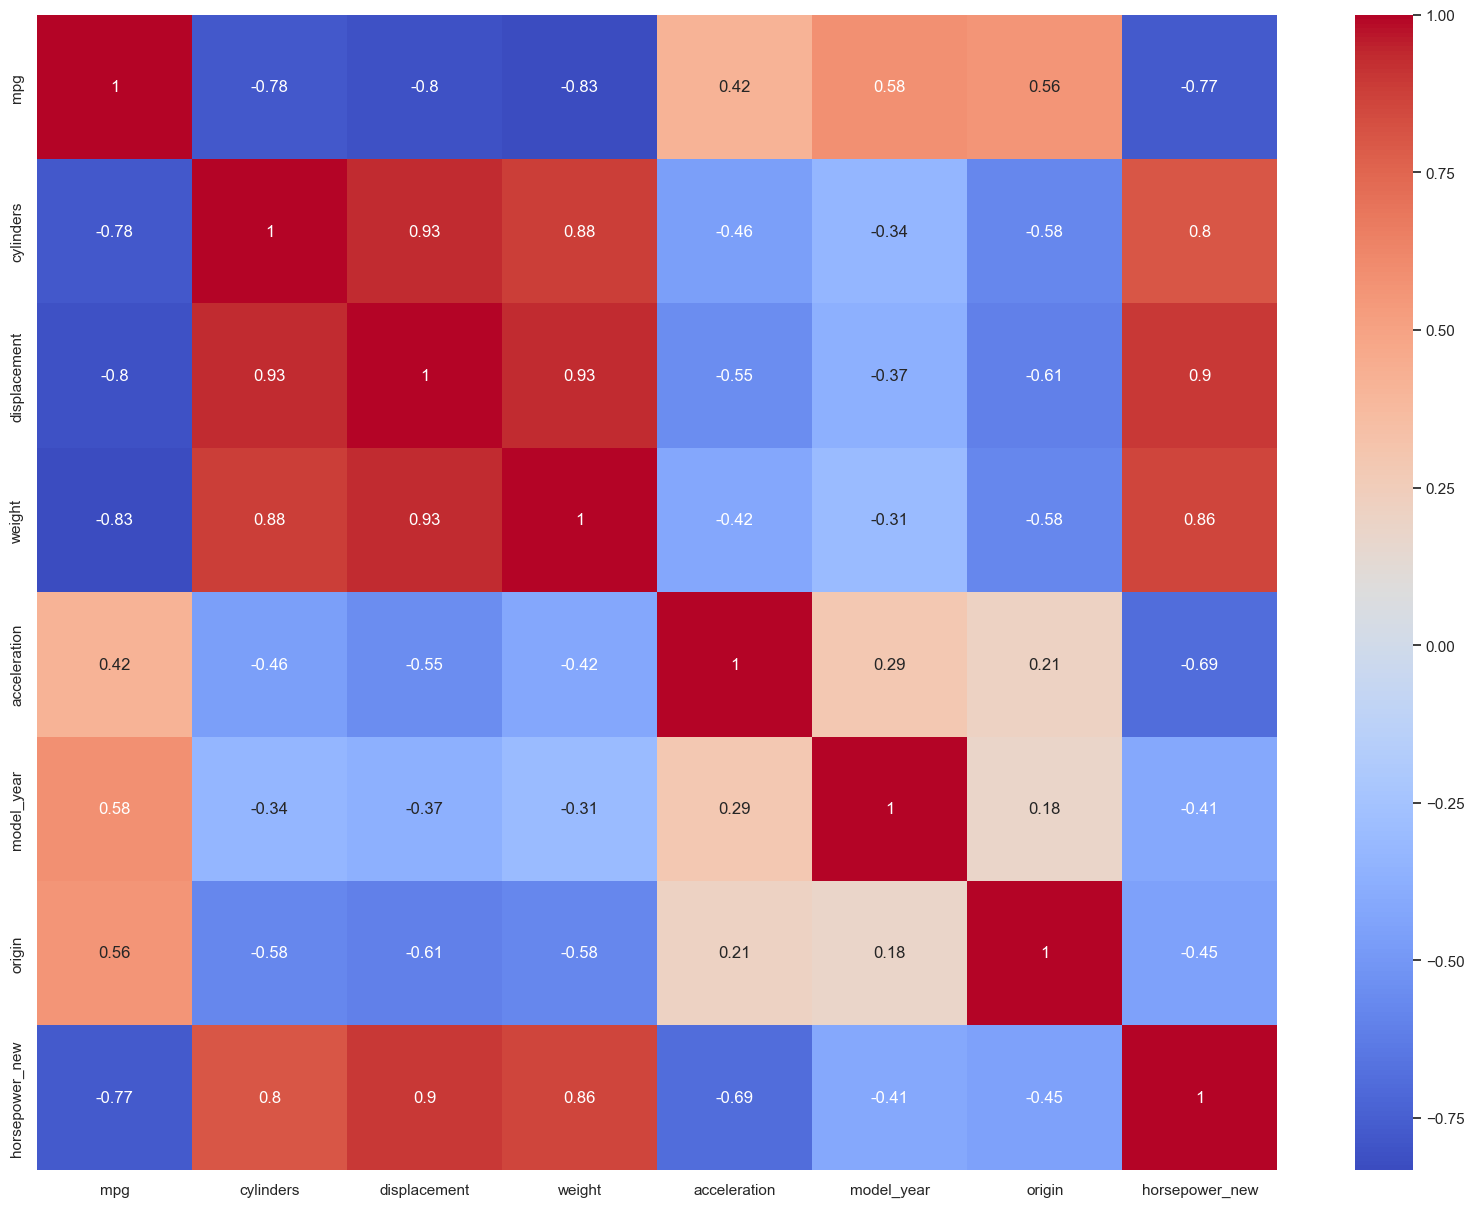

In [31]:
# finding correlation 
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot = True,cmap='coolwarm')
plt.show()

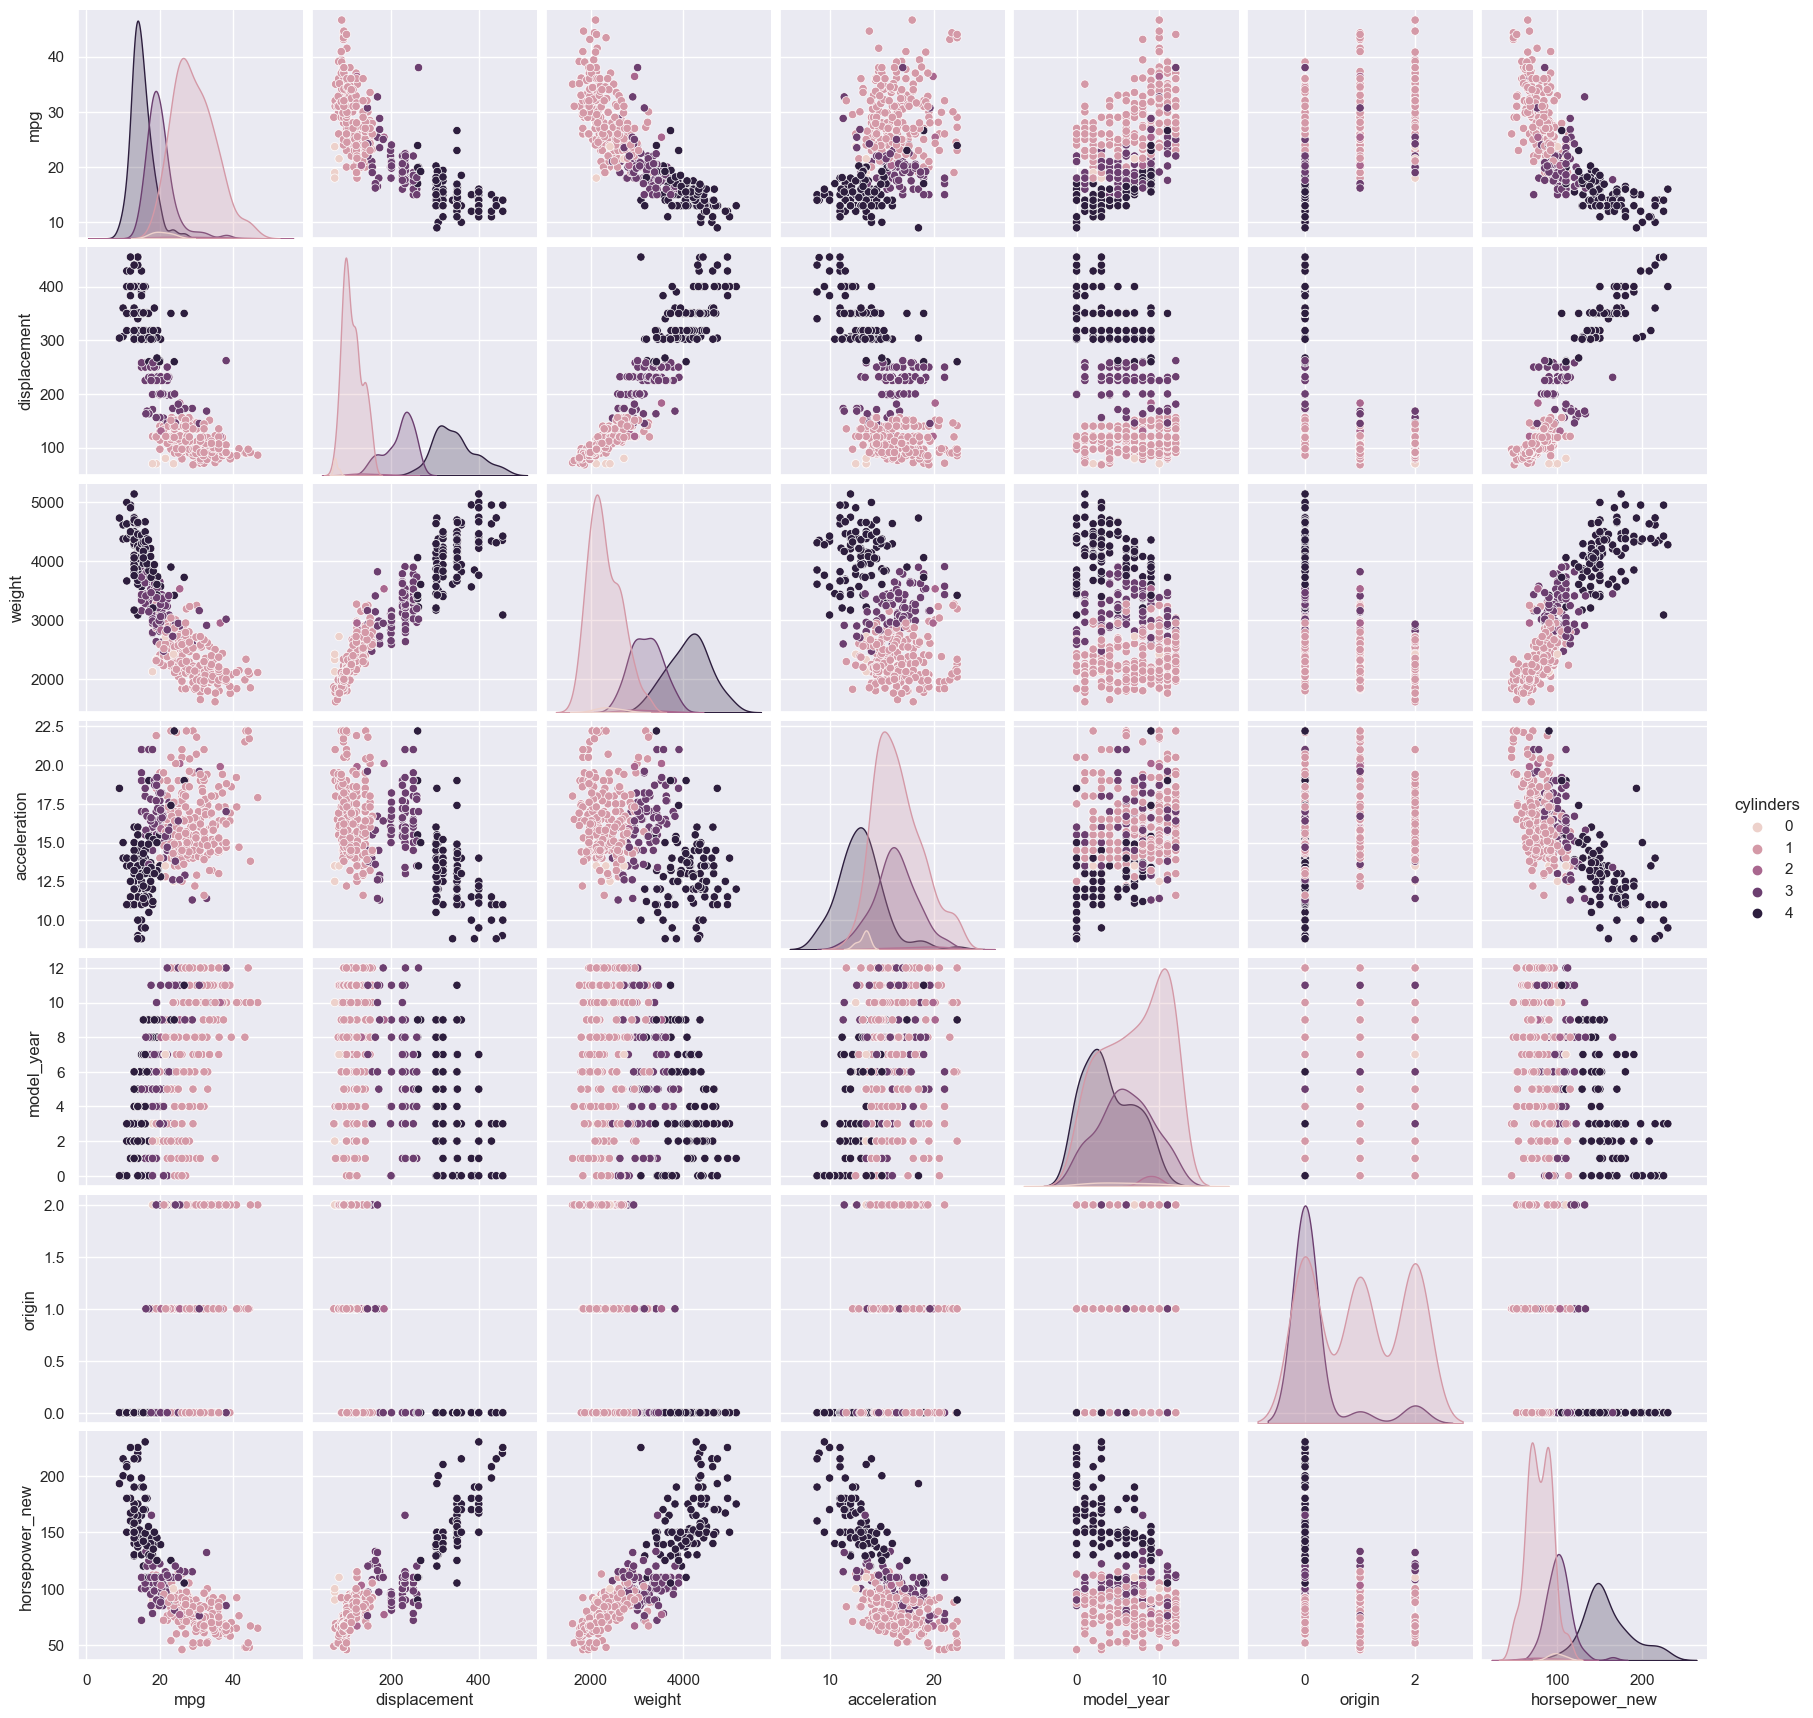

In [32]:
# plotting pairplot to analyze dataset at once

sns.pairplot(data = data, hue = 'cylinders')

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=101)

In [34]:
# Rergrssion model 1
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
print(lm.coef_)
print('***********'*5)
print(lm.intercept_)

[[ 0.01520499 -0.00688301  0.0592133   0.78616418  1.16995869 -0.01721717]]
*******************************************************
[36.60074904]


In [36]:
x_test.head()

,displacement,weight,acceleration,model_year,origin,horsepower_new
130,122.0,2451,16.5,4,0,80
202,258.0,3193,17.8,6,0,95
322,86.0,2110,17.9,10,2,65
104,400.0,4906,12.5,3,0,167
91,400.0,4464,12.0,3,0,150


# Predict test dataset wih linear model

In [37]:
y_pred = lm.predict(x_test)
y_pred

array([[24.32978998],
       [22.68151893],
       [33.52757722],
       [ 9.13806293],
       [12.44344079],
       [26.08186269],
       [34.43798179],
       [25.11370197],
       [27.03714153],
       [24.0735922 ],
       [25.75123137],
       [26.39348539],
       [34.75037624],
       [28.60873554],
       [17.20164285],
       [18.55360875],
       [20.71415173],
       [19.86982306],
       [25.66218644],
       [25.39752065],
       [ 8.58575882],
       [24.33951096],
       [29.39886739],
       [20.72518866],
       [15.50028393],
       [32.80409456],
       [25.35716315],
       [29.64592711],
       [17.42654862],
       [ 9.77994572],
       [20.60806978],
       [34.06511164],
       [24.67313184],
       [26.07496705],
       [25.8439045 ],
       [11.60777446],
       [28.3439356 ],
       [30.20284646],
       [15.95486995],
       [24.47684353],
       [32.71758896],
       [16.40550344],
       [26.66595053],
       [14.16428926],
       [21.65874182],
       [19

# Evaluation for model 1

In [38]:
from sklearn.metrics import r2_score
print("Accuracy: ", r2_score(y_test,y_pred))

Accuracy:  0.8050952184103184


# OLS method

In [40]:
# model1 

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [41]:
reg1 = smf.OLS(endog = y_train,exog=x_train).fit()

In [42]:
reg_test1 = smf.OLS(endog = y_test,exog = x_test).fit()

In [43]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1543.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                   1.37e-228
Time:                        11:31:10   Log-Likelihood:                         -929.90
No. Observations:                 318   AIC:                                      1872.
Df Residuals:                     312   BIC:                                      1894.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
displacement       0.0137      0.009      1.573      0.117      -0.003       0.031
weight            -0.0088      0.001     -8.521      0.000      -0.011      -0.007
acceleration       1.6214      0.084     19.239      0.000       1.456       1.787
model_year         1.0404      0.074     14.139      0.000       0.896       1.185
origin             2.1056      0.404      5.210      0.000       1.310       2.901
horsepower_new     0.1359      0.016      8.257      0.000       0.103       0.168
==============================================================================
Omnibus:                        1.485   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                1.533
Skew:                           0.163   Prob(JB):                        0.465
Kurtosis:                       2.900   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
reg_test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              514.5
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                    3.30e-58
Time:                        11:31:17   Log-Likelihood:                         -217.81
No. Observations:                  80   AIC:                                      447.6
Df Residuals:                      74   BIC:                                      461.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
displacement      -0.0257      0.015     -1.760      0.083      -0.055       0.003
weight            -0.0041      0.001     -2.962      0.004      -0.007      -0.001
acceleration       1.4029      0.117     11.946      0.000       1.169       1.637
model_year         0.6845      0.135      5.073      0.000       0.416       0.953
origin             3.0225      0.748      4.043      0.000       1.533       4.512
horsepower_new     0.1234      0.028      4.431      0.000       0.068       0.179
==============================================================================
Omnibus:                        3.085   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.425
Skew:                           0.406   Prob(JB):                        0.297
Kurtosis:                       3.258   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

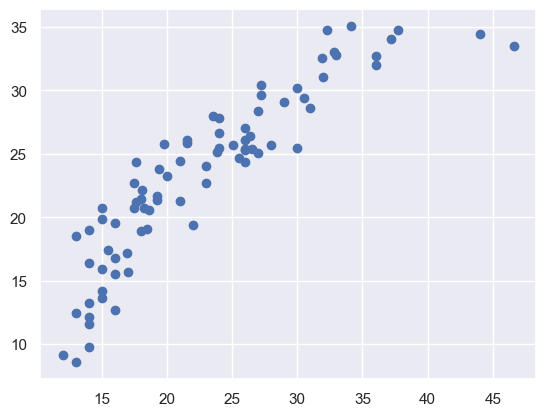

In [45]:
plt.scatter(y_test,y_pred)
plt.show()

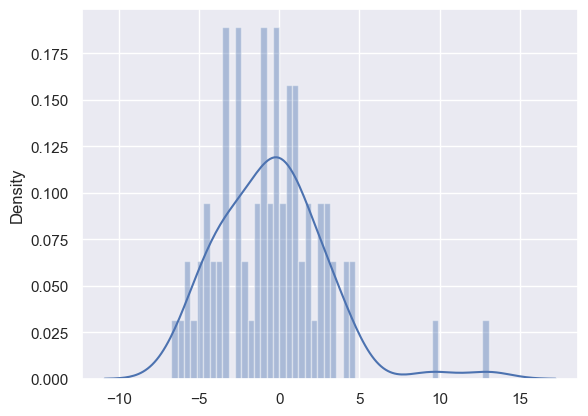

In [47]:
sns.distplot((y_test-y_pred),bins = 50)
plt.show()

In [ ]:
#Anova test for comparing  mpg and displacement column relation

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
data1 = pd.read_csv('mpg.csv')
data1.head()

In [ ]:
model = ols('mpg~displacement', data=data1).fit()
annova_result = sm.stats.anova_lm(model,typ=2)
print(annova_result)

#### Conclusion(Anova Test):- 

##### It seems to be the result of a one-way ANOVA, specifically focusing on the "displacement" variable. The F-statistic is high, and the p-value is very low, suggesting that the "displacement" variable has a significant effect on the response variable. Hence, we will try second linear model without displacement column.


# Linear Model 2

In [48]:
data.drop('displacement',axis = 1, inplace = True)
data.head()

,mpg,cylinders,weight,acceleration,model_year,origin,horsepower_new
0,18.0,4,3504,12.0,0,0,130
1,15.0,4,3693,11.5,0,0,165
2,18.0,4,3436,11.0,0,0,150
3,16.0,4,3433,12.0,0,0,150
4,17.0,4,3449,10.5,0,0,140


In [49]:
x1 = data.iloc[:,2:]
y1 = data.iloc[:,0:1]

In [50]:
scaler1 = StandardScaler()
sc_x1 = scaler1.fit_transform(x1)
pd.DataFrame(sc_x1)

,0,1,2,3,4
0,0.630870,-1.320595,-1.627426,-0.715145,0.673589
1,0.854333,-1.506489,-1.627426,-0.715145,1.590266
2,0.550470,-1.692383,-1.627426,-0.715145,1.197404
3,0.546923,-1.320595,-1.627426,-0.715145,1.197404
4,0.565841,-1.878278,-1.627426,-0.715145,0.935497
...,...,...,...,...,...
393,-0.213324,0.017842,1.621983,-0.715145,-0.478804
394,-0.993671,2.471644,1.621983,0.533222,-1.369289
395,-0.798585,-1.469311,1.621983,-0.715145,-0.531185
396,-0.408411,1.133207,1.621983,-0.715145,-0.662139


In [54]:
vif1 = pd.DataFrame()
vif1['variance_inflation_factor1'] = [variance_inflation_factor(var1,i) for i in range(var1.shape[1])]
vif1['features'] = x1.columns

In [53]:
var1 = sc_x1
var1.shape

(398, 5)

In [55]:
vif1

,variance_inflation_factor1,features
0,6.120806,weight
1,2.499726,acceleration
2,1.228353,model_year
3,1.538155,origin
4,8.699791,horsepower_new


In [56]:
#train test split for second linear model
(x1_train,x1_test,y1_train,y1_test) = train_test_split(x1,y1,test_size = 0.2,random_state=101)

In [57]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression()

In [58]:
y1_pred = lm1.predict(x1_test)
y1_pred

array([[24.67141909],
       [21.85002448],
       [33.25246854],
       [ 9.19258794],
       [11.87363863],
       [26.84693733],
       [33.81272775],
       [25.41645485],
       [26.2725117 ],
       [24.34405765],
       [25.41768553],
       [26.84256453],
       [34.26322503],
       [28.16717412],
       [17.01226883],
       [18.17578991],
       [19.90359117],
       [19.45393895],
       [25.7879024 ],
       [25.80089887],
       [ 8.52586436],
       [24.30678357],
       [29.42283771],
       [20.20832814],
       [15.73158117],
       [32.06505479],
       [25.70529563],
       [29.84726814],
       [17.31077758],
       [ 9.0420631 ],
       [20.81716152],
       [33.79204695],
       [25.19650056],
       [26.51599687],
       [27.093569  ],
       [11.61432794],
       [28.5560865 ],
       [30.48753813],
       [15.75164895],
       [24.2109772 ],
       [32.8024156 ],
       [16.36215631],
       [26.55833956],
       [14.32627697],
       [21.58586971],
       [18

In [59]:
# cheking r2_score of linear model 2
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y1_test,y1_pred))

Accuracy:  0.8078071902824695


### OLS  method

In [60]:
reg2 = smf.OLS(endog=y1_train,exog = x1_train).fit()

In [61]:
reg2_test = smf.OLS(endog = y1_test,exog=x1_test).fit()

In [62]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1842.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                   1.04e-229
Time:                        11:32:18   Log-Likelihood:                         -931.15
No. Observations:                 318   AIC:                                      1872.
Df Residuals:                     313   BIC:                                      1891.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
weight            -0.0077      0.001    -10.132      0.000      -0.009      -0.006
acceleration       1.5502      0.071     21.747      0.000       1.410       1.691
model_year         1.0298      0.073     14.021      0.000       0.885       1.174
origin             1.8944      0.382      4.958      0.000       1.143       2.646
horsepower_new     0.1419      0.016      8.851      0.000       0.110       0.173
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.750
Skew:                           0.117   Prob(JB):                        0.687
Kurtosis:                       2.959   Cond. No.                     4.64e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""